 # Part 2: BASIS FUNCTION

Write a program in python to implement the MAP (or regularization) for polynomial curve fitting problem. Follow the instructions below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate 50 2D-data points using the following function

In [2]:
np.random.seed(5027)
x = np.linspace(0, 1, 50)
y = np.sin(x * x + 1)

Add Gaussian random noise to the data


In [3]:
noise = np.random.normal(0, 0.03, 50)
y_noise = y + noise

Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

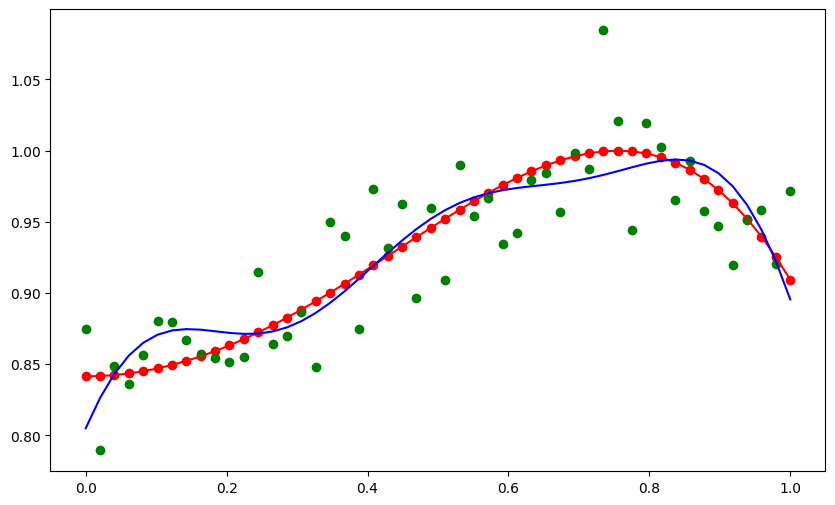

In [4]:
num = 5      ###number in basis function
sigma = 0.2

def gaussian_basis(x, mu, sigma):
    return np.exp( -0.5 * ((x - mu) / sigma)**2)

phi = np.zeros((50, num))
mu = np.linspace(0, 1, num)
for i in range(50):
    for j in range(num):
        phi[i, j] = gaussian_basis(x[i], mu[j], sigma)
        
W = np.linalg.inv(phi.T @ phi) @ phi.T @ y_noise
y_pred = W @ phi.T

plt.figure(figsize=(10,6))
plt.plot(x, y, color = "r")
plt.plot(x, y_pred, color = "b")
plt.scatter(x, y, color = "r")
plt.scatter(x, y_noise, color = "g")
plt.show()

Show your results for different values of M that generate overfitting and underfitting curves. 

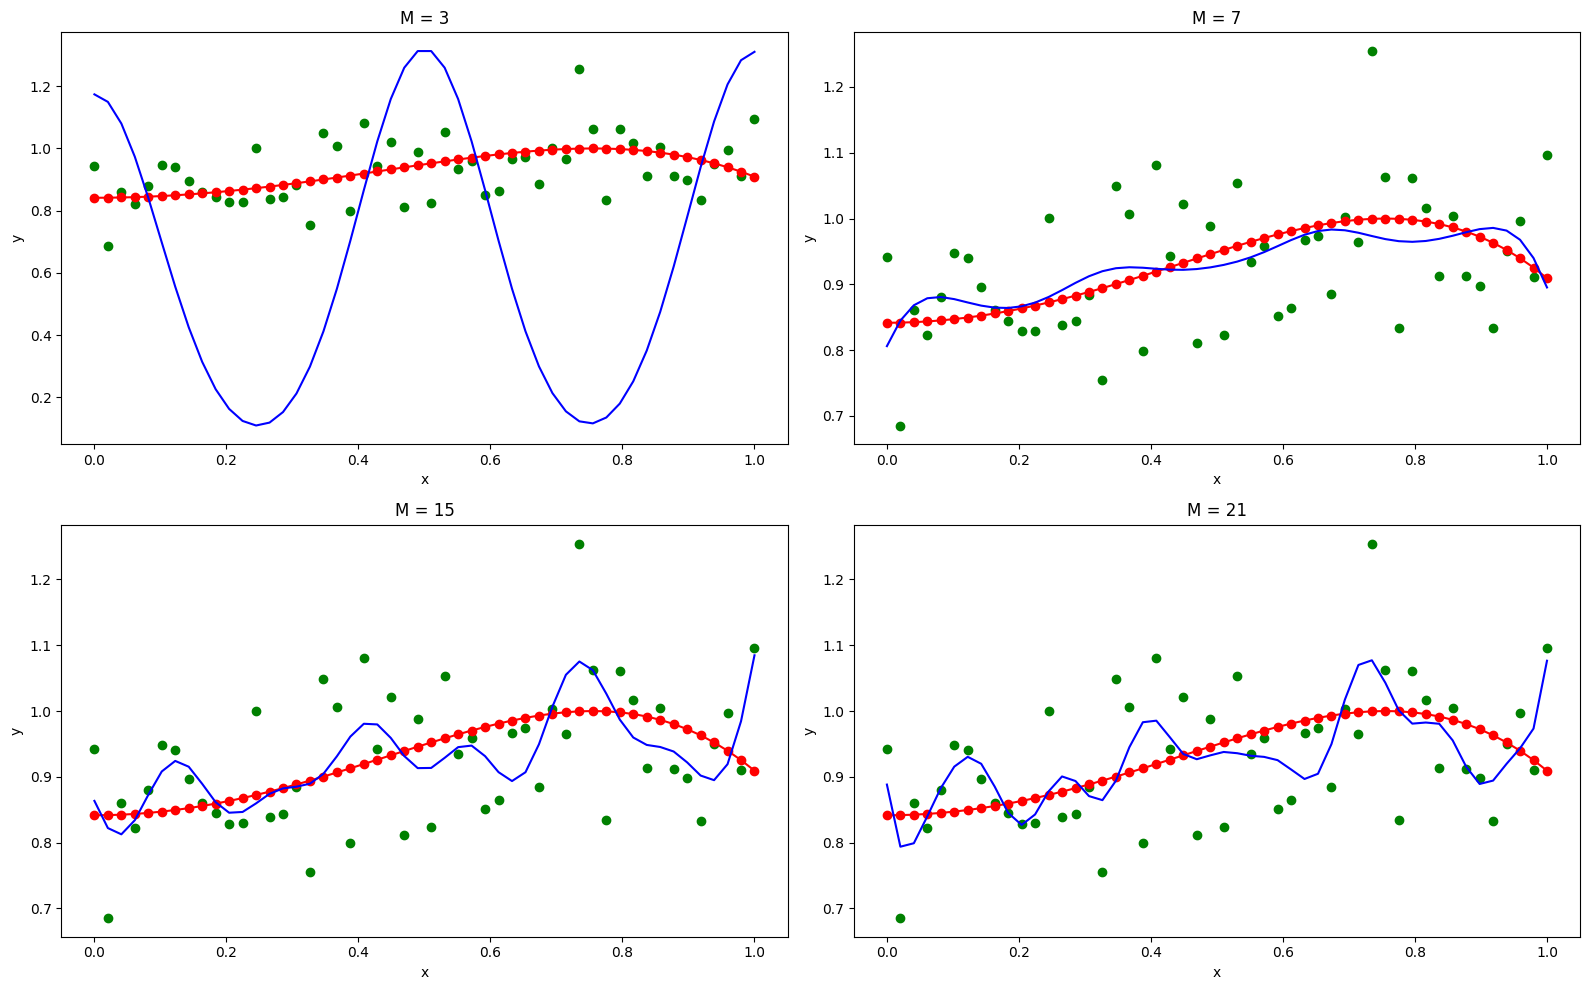

In [5]:
np.random.seed(5027)
x = np.linspace(0, 1, 50)
noise = np.random.normal(0, 0.09, 50)
y_noise = np.sin(x ** 2 + 1) + noise
y = np.sin(x ** 2 + 1)

M_trial = [3, 7, 15, 21]
sigma = 0.1

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i, M in enumerate(M_trial):
    row = i // 2
    col = i % 2
    
    
    phi = np.zeros((50, M))
    mu = np.linspace(0, 1, M)
    for j in range(50):
        for k in range(M):
            phi[j, k] = gaussian_basis(x[j], mu[k], sigma)
     
    W = np.linalg.inv(phi.T @ phi) @ phi.T @ y_noise
    y_pred = W @ phi.T
    
    axs[row, col].scatter(x, y_noise, color = "g")
    axs[row, col].scatter(x, y, color = "r")
    axs[row, col].plot(x, y, color = "r")
    axs[row, col].plot(x, y_pred, color = "b")
    axs[row, col].set_xlabel("x")
    axs[row, col].set_ylabel("y")
    axs[row, col].set_title(f"M = {M}")
         
plt.tight_layout()
plt.show()

M = 3: underfitting

M = 21: overfitting

Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

In [6]:
def sigmoid_basis(x, mu, sigma):
    a = (x - mu) / sigma
    sigmoid = 1 / (1 + np.exp(- a))
    return sigmoid

In [7]:
M = 5     ###number in basis function

In [8]:
basis = np.linspace(0, 1, M)            
matrix = np.zeros((50, M))
for j in range(50):
    for k in range(M):
        matrix[j, k] = sigmoid_basis(x[j], basis[k], sigma)

In [9]:
W = np.linalg.inv(matrix.T @ matrix) @ matrix.T @ y_noise

In [10]:
matrix_pred = np.array([sigmoid_basis(x, mu, sigma) for x in x for mu in basis]).reshape(-1, M)
y_pred = matrix_pred @ W

In [11]:
#plt.plot(x, y_line, color = 'r')
#plt.plot(x, y_pred, color = 'b')
#plt.scatter(x, y, color = 'r')
#plt.scatter(x, y_noise, color = 'g')
#plt.show()

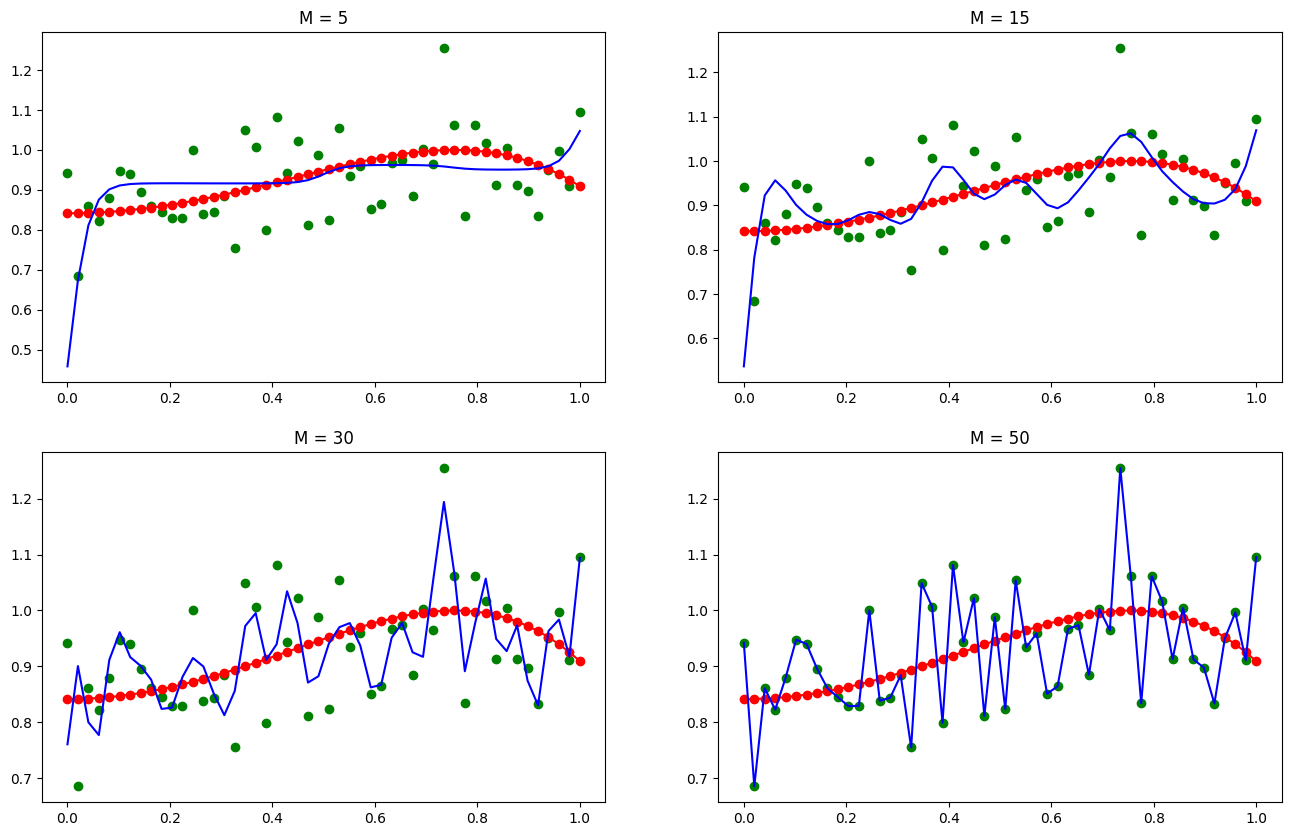

In [12]:
M_trial = [5, 15, 30, 50]
sigma = 0.02

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i, M in enumerate(M_trial):
    
    row = i // 2
    col = i % 2
    
    
    phi = np.zeros((50, M))
    mu = np.linspace(0, 1, M)
    for j in range(50):
        for k in range(M):
            phi[j, k] = sigmoid_basis(x[j], mu[k], sigma)
     
    phi_T = np.transpose(phi)
    W = np.linalg.inv(phi_T @ phi) @ phi_T @ y_noise
    y_pred = W @ phi_T
    
    #basis = np.linspace(0, 1, M)       
    #matrix = np.zeros((50, M))
    #for j in range(50):
    #    for k in range(M):
    #        matrix[j, k] = sigmoid_basis(x[j], basis[k], sigma)
    #matrix_T = np.transpose(matrix)
    #W = np.linalg.inv(matrix_T @ matrix) @ matrix_T @ y_noise
    #matrix_pred = np.array([sigmoid_basis(x, mu, sigma) for x in x for mu in basis]).reshape(-1, M)
    #y_pred = matrix_pred @ W   
        
    axs[row, col].scatter(x, y_noise, color = "g")
    axs[row, col].scatter(x, y, color = "r")
    axs[row, col].plot(x,y, color = "r")
    axs[row, col].plot(x, y_pred, color = "b")
    axs[row, col].set_title(f'M = {M}')

Change the original curve function to  , and use the sigmoid basis function to estimate the best curve fitting from the noisy data. 

In [13]:
x = np.linspace(0, 9, 50)
y = 0.4345 * x**3 - 5.607 * x**2 + 16.78 * x - 10.61

In [14]:
noise = np.random.normal(0, 5, 50)
y_noise = y + noise

In [15]:
M_trial = [3, 8, 15, 30]

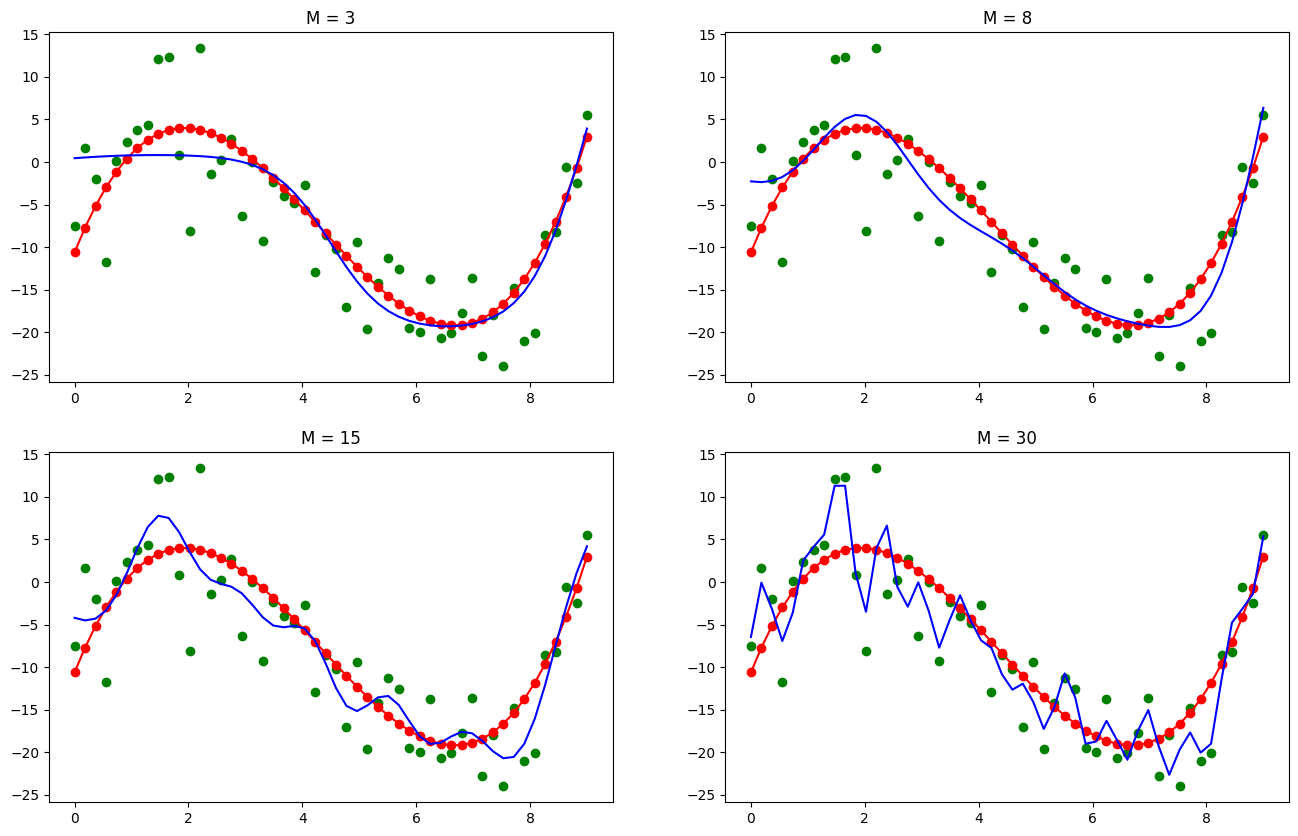

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i, M in enumerate(M_trial):
    
    row = i // 2
    col = i % 2
    
    sigma = 0.5

    
    phi = np.zeros((50, M))
    mu = np.linspace(0, 9, M)
    for j in range(50):
        for k in range(M):
            phi[j, k] = sigmoid_basis(x[j], mu[k], sigma)
     
    phi_T = np.transpose(phi)
    W = np.linalg.inv(phi_T @ phi) @ phi_T @ y_noise
    y_pred = W @ phi_T
    
    
    #MU = np.linspace(0, 9, M)            
    #matrix = np.zeros((50, M))
    #for j in range(50):
    #    for k in range(M):
    #        matrix[j, k] = sigmoid_basis(x[j], MU[k], sigma)
    #matrix_T = np.transpose(matrix)
    #W = np.linalg.inv(matrix_T @ matrix) @ matrix_T @ y_noise
    #matrix_pred = np.array([sigmoid_basis(x, mu, sigma) for x in x for mu in MU]).reshape(-1, M)
    #y_pred = matrix_pred @ W   
        
    axs[row, col].scatter(x, y_noise, color = "g")
    axs[row, col].scatter(x, y, color = "r")
    axs[row, col].plot(x,y, color = "r")
    axs[row, col].plot(x, y_pred, color = "b")
    axs[row, col].set_title(f"M = {M}")

best fit: M = 8

Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

In [17]:
M_trial = [2, 10, 20, 30]        ###########change!!!!!!!!!!!!
sigma_trial = [0.01, 0.03, 0.05, 0.55]       ###########change!!!!!!!!!!!!

/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_98420/1614212747.py:3: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(- a))


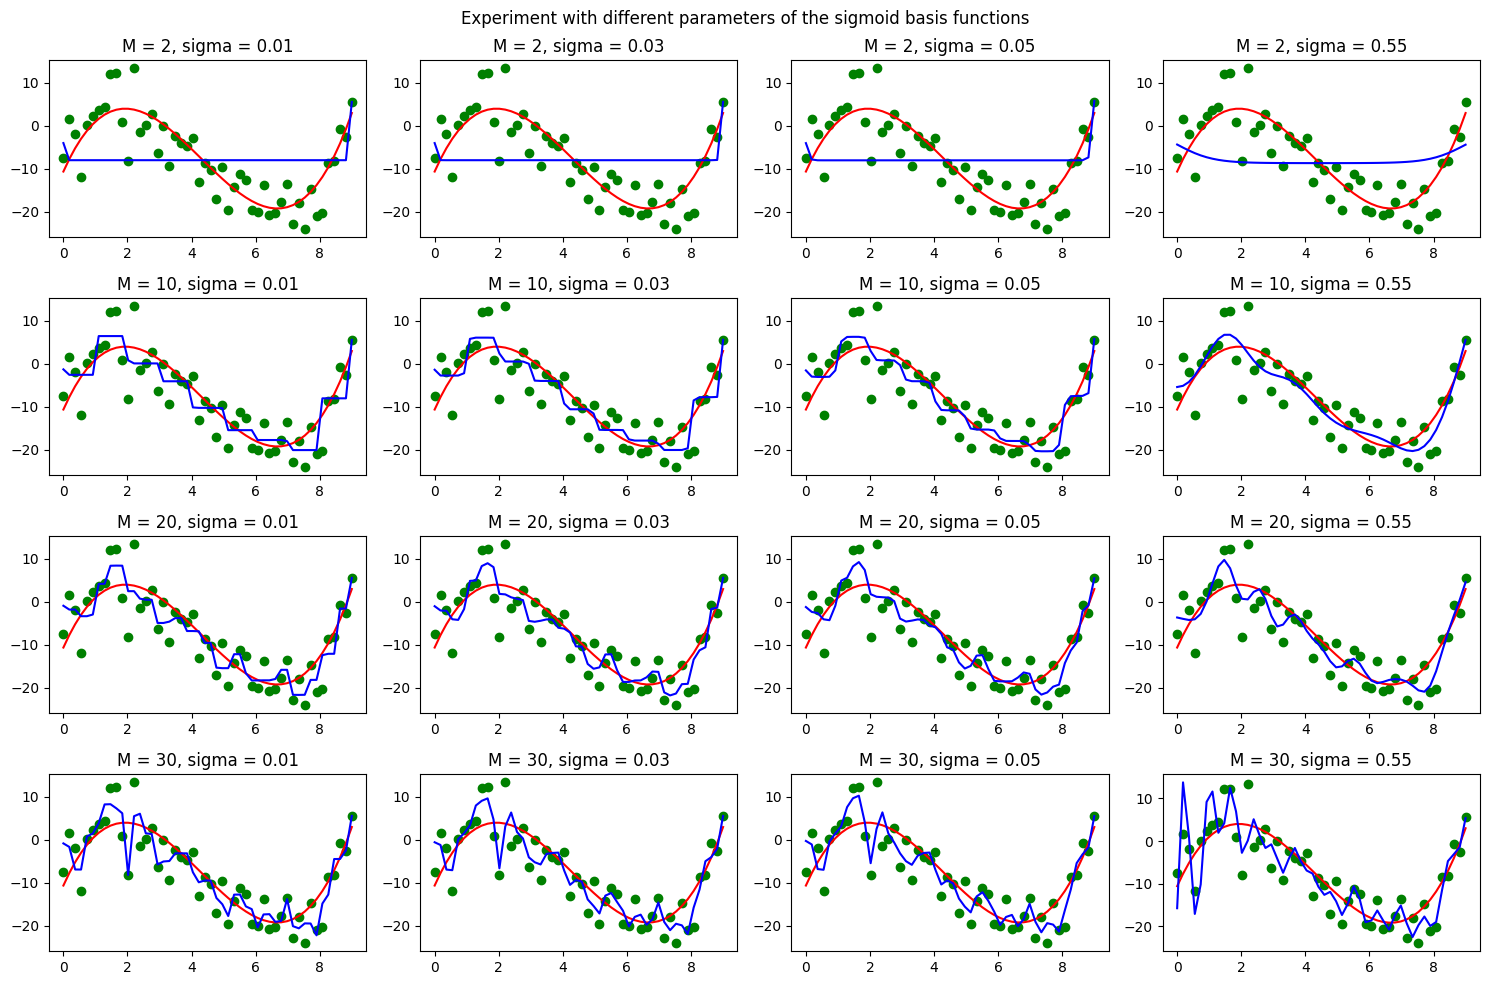

In [18]:
fig, axes = plt.subplots(len(M_trial), len(sigma_trial), figsize=(15, 10))


for i, M in enumerate(M_trial):
    for j, sigma in enumerate(sigma_trial):
        
        #MU = np.linspace(0, 9, M)        ###########change!!!!!!!!!!!!
        
        phi = np.zeros((50, M))
        mu = np.linspace(0, 9, M)
        for k in range(50):
            for l in range(M):
                phi[k, l] = sigmoid_basis(x[k], mu[l], sigma)
     
        phi_T = np.transpose(phi)
        W = np.linalg.inv(phi_T @ phi) @ phi_T @ y_noise
        y_pred = W @ phi_T

        #matrix = np.zeros((50, M))
        #for k in range(50):
        #    for l in range(M):
        #        matrix[k, l] = sigmoid_basis(x[k], MU[l], sigma)
        #matrix_T = np.transpose(matrix)
        #w = np.linalg.inv(matrix_T @ matrix) @ matrix_T @ y_noise
        #matrix_pred = np.array([sigmoid_basis(x, mu, sigma) for x in x for mu in MU]).reshape(-1, M)
        #y_pred = matrix_pred @ w

        axes[i, j].scatter(x, y_noise, color = "g")
        axes[i, j].plot(x, y, color = "r")
        axes[i, j].plot(x, y_pred, color = "b")
        axes[i, j].set_title(f"M = {M}, sigma = {sigma}")
        
plt.suptitle("Experiment with different parameters of the sigmoid basis functions")
plt.tight_layout()
plt.show()

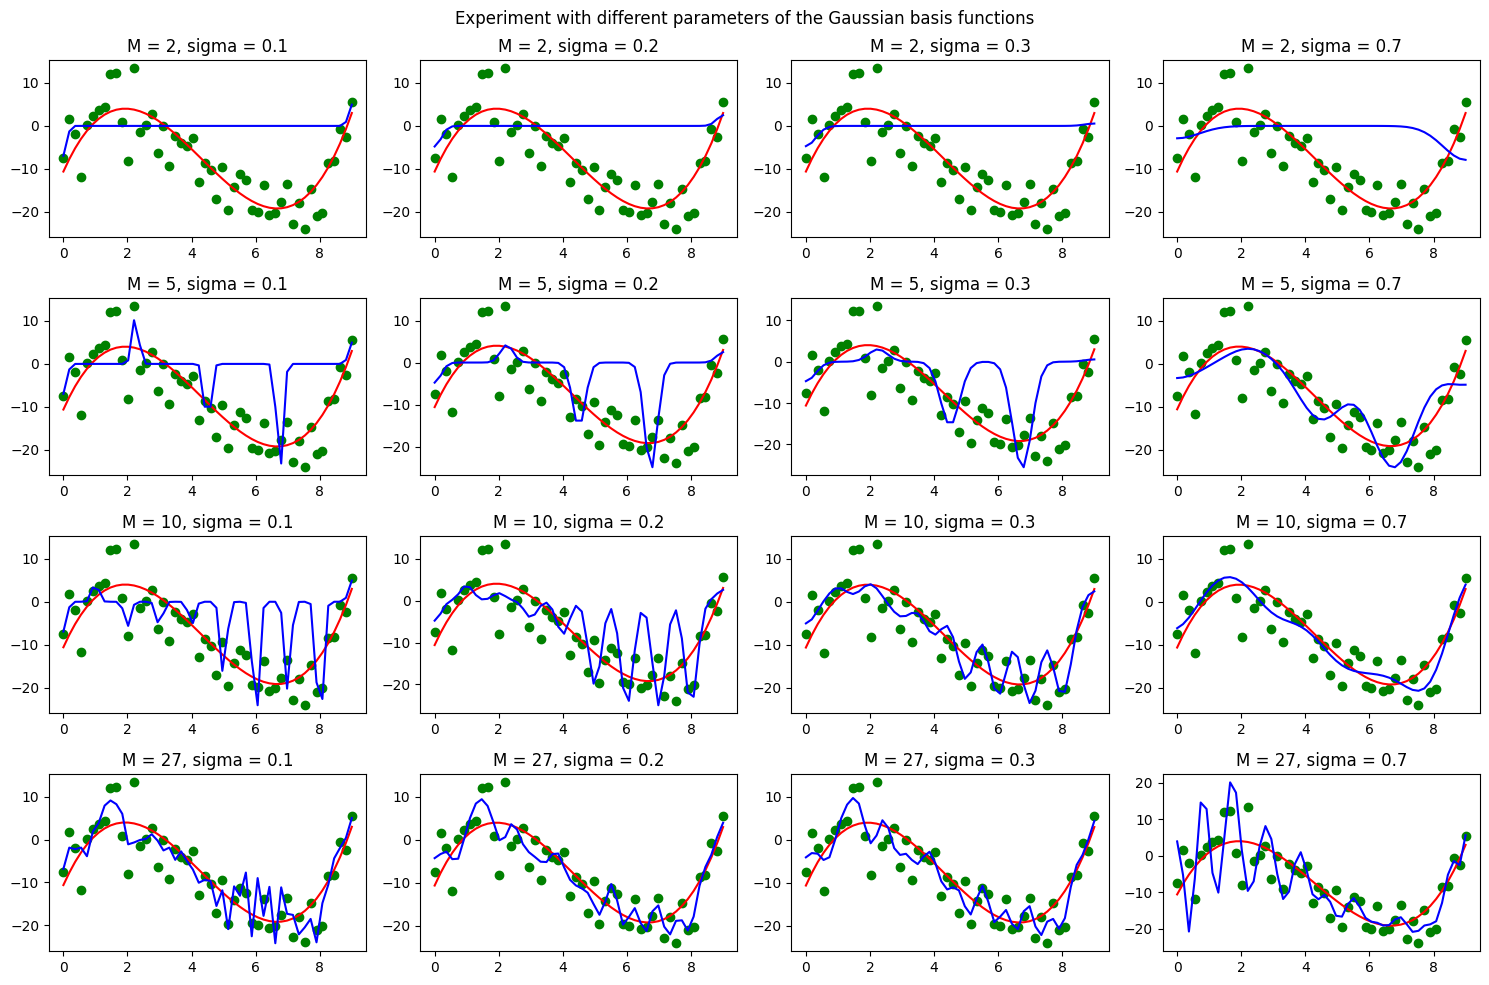

In [19]:
M_trial = [2, 5, 10, 27]        ###########change!!!!!!!!!!!!
sigma_trial = [0.1, 0.2, 0.3, 0.7]       ###########change!!!!!!!!!!!!

fig, axes = plt.subplots(len(M_trial), len(sigma_trial), figsize=(15, 10))


for i, M in enumerate(M_trial):
    for j, sigma in enumerate(sigma_trial):
        
        
        phi = np.zeros((50, M))
        mu = np.linspace(0, 9, M)
        for k in range(50):
            for l in range(M):
                phi[k, l] = gaussian_basis(x[k], mu[l], sigma)
     
        W = np.linalg.inv(phi.T @ phi) @ phi.T @ y_noise
        y_pred = W @ phi.T
        
        #MU = np.linspace(0, 9, M)
        #matrix = np.zeros((50, M))
        #for k in range(50):
        #    for l in range(M):
        #        matrix[k, l] = gaussian_basis(x[k], MU[l], sigma)
        #matrix_T = np.transpose(matrix)
        #w = np.linalg.inv(matrix_T @ matrix) @ matrix_T @ y_noise
        #matrix_pred = np.array([gaussian_basis(x, mu, sigma) for x in x for mu in MU]).reshape(-1, M)
        #y_pred = matrix_pred @ w

        axes[i, j].scatter(x, y_noise, color = "g")
        axes[i, j].plot(x, y, color = "r")
        axes[i, j].plot(x, y_pred, color = "b")
        axes[i, j].set_title(f"M = {M}, sigma = {sigma}")

plt.suptitle('Experiment with different parameters of the Gaussian basis functions')
plt.tight_layout()
plt.show()


Polynomial function can be unstable numerically. For instance, imagine M equals 51. We need to calculate $x_i^{50}$ in polynomial function, which would be a huge number. Assuming the underlying curve is simple (e.g. quadratic), most of the w will be extremely small. These two factors of huge number of $x_i^{50}$ and w can cause numerical problems in implementation. 

The Basis Functions such as Sigmoid and Gaussian basis could be easy to process a high dimensionality of $\bar{x_i}$. Since basis functions is non-linear, they can more effectively and deeply capture the complex relationships between inputs and outputs. It could include more information and patterns behind the data, and could made complex prediction when it is compared to polynomials. 

We can also express $\bar{x_n}$(D✖️1) using $\bar{\phi_n}$ (M✖️1), which implies that we transform $\bar{x_n}$ using $\bar{\phi_n}$ in a such a way the dimensionality changes from D✖️1 to M✖️1.